<a href="https://colab.research.google.com/github/Daniel9905/cs194proj4/blob/main/CS194_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xml.etree.ElementTree as ET 
import numpy as np
import os 
from __future__ import print_function, division
import torch
import pandas as pd
from skimage import io
import skimage.transform as sktr
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
from skimage.color import rgb2gray
import glob
import cv2
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf

In [ ]:
if not os.path.exists('/content/ibug_300W_large_face_landmark_dataset'):
  !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
  !unzip 'ibug_300W_large_face_landmark_dataset.zip'    
  !rm -r 'ibug_300W_large_face_landmark_dataset.zip'
  
os.path.exists('/content/ibug_300W_large_face_landmark_dataset')

True

In [ ]:
tree = ET.parse('ibug_300W_large_face_landmark_dataset/labels_ibug_300W_train.xml')
root = tree.getroot()
root_dir = 'ibug_300W_large_face_landmark_dataset'

bboxes = [] # face bounding box used to crop the image
landmarks = [] # the facial keypoints/landmarks for the whole training dataset
img_filenames = [] # the image names for the whole dataset

for filename in root[2]:
	img_filenames.append(os.path.join(root_dir, filename.attrib['file']))
	box = filename[0].attrib
	# x, y for the top left corner of the box, w, h for box width and height
	bboxes.append([box['left'], box['top'], box['width'], box['height']]) 

	landmark = []
	for num in range(68):
		x_coordinate = int(filename[0][num].attrib['x'])
		y_coordinate = int(filename[0][num].attrib['y'])
		landmark.append([x_coordinate, y_coordinate])
	landmarks.append(landmark)

landmarks = np.array(landmarks).astype('float32')     
bboxes = np.array(bboxes).astype('float32') 

In [20]:
# img_filenames

In [49]:
images_gray = []
resized_lands_all = []

# Process the images. Crop and Scale the iamges and the keypoints.
for i in range(len(img_filenames)):
  im = cv2.imread(img_filenames[i])
  
  box = bboxes[i].astype(int)
  land = landmarks[i]
  left, top = box[0], box[1]
  right = left + box[2]
  bottom = top + box[3]
  face = im[top:bottom, left:right]
  face = rgb2gray(face)
  print("Processing", i)
  # rescale
  resized = cv2.resize(face, (224, 224))
  cropped_lands = np.asarray([[p[0] - left, p[1] - top] for p in land])


  resized_lands = np.zeros(cropped_lands.shape)
  resized_lands[:,0] = cropped_lands[:, 0] * (224/face.shape[1])
  resized_lands[:,1] = cropped_lands[:, 1] * (224/face.shape[0])

  resized_lands_all.append(resized_lands)
  images_gray.append(resized)
  # plt.imshow(resized, cmap = "gray")
  # for p in resized_lands:
  #   plt.plot(p[0], p[1], "ro")
  
  # plt.show()

images_gray = np.asarray(images_gray)
resized_lands_all = np.asarray(resized_lands_all)
print(resized_lands_all.shape)
print(images_gray.shape)

Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Processing 30
Processing 31
Processing 32
Processing 33
Processing 34
Processing 35
Processing 36
Processing 37
Processing 38
Processing 39
Processing 40
Processing 41
Processing 42
Processing 43
Processing 44
Processing 45
Processing 46
Processing 47
Processing 48
Processing 49
Processing 50
Processing 51
Processing 52
Processing 53
Processing 54
Processing 55
Processing 56


error: ignored

[ 67. -57. 373. 414.]


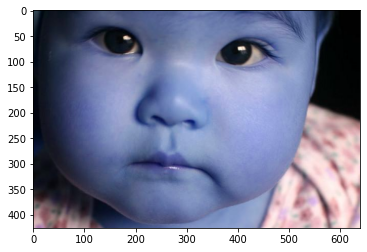

In [58]:
im = cv2.imread(img_filenames[56])
plt.imshow(im)

print(bboxes[56])